In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import sport_key

In [2]:
# Take in all of our wrestling data and read it into pandas
all_players_2014 = "Resources/all_players_2014.csv"
all_players_2015 = "Resources/all_players_2015.csv"
all_players_2016 = "Resources/all_players_2016.csv"
all_players_2017 = "Resources/all_players_2017.csv"
all_players_2018 = "Resources/all_players_2018.csv"

all_players_2014_df = pd.read_csv(all_players_2014)
all_players_2015_df = pd.read_csv(all_players_2015)
all_players_2016_df = pd.read_csv(all_players_2016)
all_players_2017_df = pd.read_csv(all_players_2017)
all_players_2018_df = pd.read_csv(all_players_2018)

In [3]:
# Append all datasets
combined_playing_years_df = all_players_2014_df
combined_playing_years_df = combined_playing_years_df.append(all_players_2015_df)
combined_playing_years_df = combined_playing_years_df.append(all_players_2016_df)
combined_playing_years_df = combined_playing_years_df.append(all_players_2017_df)
combined_playing_years_df = combined_playing_years_df.append(all_players_2018_df)

combined_playing_years_df.to_csv(f"Resources/combined_playing_years_df.csv", index=False)

combined_playing_years_df.head()

,Player_ID,Player_Name,Position,Season_Year,Team_name
0,0268a19e-6227-4fba-83fd-6aa52176dc3a,Steve Maneri,TE,2014,Patriots
1,05526dc5-8397-4741-81bb-46ef2aba446e,Bruce Gaston,DT,2014,Patriots
2,0ad26168-7f0e-4eb9-8776-7166b5ebab16,Brandon Browner,CB,2014,Patriots
3,10616740-2c72-4207-b8ed-9da09ecba854,Ryan Wendell,G,2014,Patriots
4,170b4c5f-a345-4899-8d81-e8982b0f3d65,Stevan Ridley,RB,2014,Patriots


In [4]:
all_QBs = combined_playing_years_df[combined_playing_years_df['Position']=='QB']
all_QBs = all_QBs.reset_index()
all_QBs = all_QBs.drop(columns = ['index'])


all_QBs_df = pd.DataFrame(all_QBs)
all_QBs_df['Player_ID'].unique()
all_QBs_df.to_csv(f"Resources/all_QBs.csv", index=False)
all_QBs_df.head()

,Player_ID,Player_Name,Position,Season_Year,Team_name
0,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,2014,Patriots
1,42de9d1d-0352-460b-9172-9452414fd7fd,Jimmy Garoppolo,QB,2014,Patriots
2,19d00799-4271-40ac-b5c4-4ea8b410a704,E.J. Manuel,QB,2014,Bills
3,5812204c-6dae-4450-8011-99e0f72864ac,Ryan Tannehill,QB,2014,Dolphins
4,76d7615e-8eb5-4761-b6a6-1e895d01baf3,Matt Moore,QB,2014,Dolphins


In [5]:
all_QBs_unique = all_QBs_df['Player_ID'].unique()
len(all_QBs_unique)

153

# Extract al QB data and save the results in a CSV file

In [7]:
all_QBs_profile = []

for qb in range(len(all_QBs_unique)):
    player_url = f"http://api.sportradar.us/nfl/official/trial/v5/en/players/{all_QBs_unique[qb]}/profile.json?"
    player_query_url = f"{player_url}api_key={sport_key}"
    print(f"reading player # {qb} ")
    player_response = requests.get(player_query_url)
    all_QBs_profile.append(player_response.json())

    time.sleep(1.5)

print("------------------")
print("Process Completed")

all_QBs_profile_df = pd.DataFrame(all_QBs_profile)
all_QBs_profile_df.to_csv(f"Resources/all_qb_profiles.csv", index=False)

reading player # 0 
reading player # 1 
reading player # 2 
reading player # 3 
reading player # 4 
reading player # 5 
reading player # 6 
reading player # 7 
reading player # 8 
reading player # 9 
reading player # 10 
reading player # 11 
reading player # 12 
reading player # 13 
reading player # 14 
reading player # 15 
reading player # 16 
reading player # 17 
reading player # 18 
reading player # 19 
reading player # 20 
reading player # 21 
reading player # 22 
reading player # 23 
reading player # 24 
reading player # 25 
reading player # 26 
reading player # 27 
reading player # 28 
reading player # 29 
reading player # 30 
reading player # 31 
reading player # 32 
reading player # 33 
reading player # 34 
reading player # 35 
reading player # 36 
reading player # 37 
reading player # 38 
reading player # 39 
reading player # 40 
reading player # 41 
reading player # 42 
reading player # 43 
reading player # 44 
reading player # 45 
reading player # 46 
reading player # 47 
re

In [8]:
len(all_QBs_profile_df)

153

In [9]:
all_QBs_profile_df.head()

,_comment,abbr_name,birth_date,birth_place,college,college_conf,draft,first_name,height,high_school,...,name,position,preferred_name,references,rookie_year,seasons,sr_id,status,team,weight
0,Generation started @ 2019-04-08 01:11:08 +0000...,T.Brady,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,"{'year': 2000, 'round': 6, 'number': 199, 'tea...",Tom,76,Junipero Serra (CA),...,Tom Brady,QB,Tom,"[{'id': 'BRA371156', 'origin': 'elias'}, {'id'...",2000.0,[{'id': 'f7e1774e-36d4-4306-9a96-a5ab5a86ea53'...,sr:player:830369,A01,"{'id': '97354895-8c77-4fd4-a860-32e62ea7382a',...",225.0
1,Generation started @ 2019-04-08 01:11:10 +0000...,J.Garoppolo,1991-11-02,"Arlington Heights, IL, USA",Eastern Illinois,Ohio Valley Conference,"{'year': 2014, 'round': 2, 'number': 62, 'team...",Jimmy,74,Rolling Meadows (IL),...,Jimmy Garoppolo,QB,Jimmy,"[{'id': '00-0031345', 'origin': 'gsis'}, {'id'...",2014.0,[{'id': '24f2211a-4247-4f59-95aa-8301e156b3bf'...,sr:player:828285,A01,"{'id': 'f0e724b0-4cbf-495a-be47-013907608da9',...",225.0
2,Generation started @ 2019-04-08 01:11:13 +0000...,E.Manuel,1990-03-19,"Virginia Beach, VA, USA",Florida State,Atlantic Coast Conference,"{'year': 2013, 'round': 1, 'number': 16, 'team...",E.J.,76,Bayside (VA),...,E.J. Manuel,QB,E.J.,"[{'id': '00-0030526', 'origin': 'gsis'}, {'id'...",2013.0,[{'id': '02e4a213-66ab-456e-b895-ea8312276fd3'...,sr:player:830627,A01,"{'id': '6680d28d-d4d2-49f6-aace-5292d3ec02c2',...",237.0
3,Generation started @ 2019-04-08 01:11:15 +0000...,R.Tannehill,1988-07-27,"Lubbock, TX, USA",Texas A&M,Big Twelve Conference,"{'year': 2012, 'round': 1, 'number': 8, 'team'...",Ryan,76,Big Spring (TX),...,Ryan Tannehill,QB,Ryan,"[{'id': '38538', 'origin': 'nflx'}, {'id': '00...",2012.0,[{'id': '1adca71b-202f-44d5-9fab-abd45d813954'...,sr:player:830319,A01,"{'id': 'd26a1ca5-722d-4274-8f97-c92e49c96315',...",216.0
4,Generation started @ 2019-04-08 01:11:17 +0000...,M.Moore,1984-08-09,"Van Nuys, CA, USA",Oregon State,Pacific Ten Conference,NaN,Matt,75,Hart (CA),...,Matt Moore,QB,Matt,"[{'id': '00-0025708', 'origin': 'gsis'}, {'id'...",2007.0,[{'id': '4997e9c2-bb02-4685-96ba-a6f33f106047'...,sr:player:829261,A01,NaN,219.0


# Player BIO

In [10]:
players_bio = []

for qb in range(len(all_QBs_profile_df)):
    players_bio.append({
        'player_id'   : all_QBs_profile_df['id'][qb],
        'player_name' : all_QBs_profile_df['name'][qb],
        'jersey_no'   : all_QBs_profile_df['jersey'][qb],
        'birth_date'  : all_QBs_profile_df['birth_date'][qb], 
        'weight'      : all_QBs_profile_df['weight'][qb],
        'height'      : all_QBs_profile_df['height'][qb],
        'position'    : all_QBs_profile_df['position'][qb],
        'birth_place' : all_QBs_profile_df['birth_place'][qb],
        'high_school' : all_QBs_profile_df['high_school'][qb], 
        'college'     : all_QBs_profile_df['college'][qb],
        'college_conf': all_QBs_profile_df['college_conf'][qb], 
        'rookie_year' : all_QBs_profile_df['rookie_year'][qb], 
        'status'      : all_QBs_profile_df['status'][qb],
        '_timestamp'  : round(time.time())
    })

players_bio_df = pd.DataFrame(players_bio)
players_bio_df.to_csv(f"Resources/players_bio.csv", index=False)
players_bio_df.head()

,_timestamp,birth_date,birth_place,college,college_conf,height,high_school,jersey_no,player_id,player_name,position,rookie_year,status,weight
0,1554686225,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,76,Junipero Serra (CA),12,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,2000.0,A01,225.0
1,1554686225,1991-11-02,"Arlington Heights, IL, USA",Eastern Illinois,Ohio Valley Conference,74,Rolling Meadows (IL),10,42de9d1d-0352-460b-9172-9452414fd7fd,Jimmy Garoppolo,QB,2014.0,A01,225.0
2,1554686225,1990-03-19,"Virginia Beach, VA, USA",Florida State,Atlantic Coast Conference,76,Bayside (VA),3,19d00799-4271-40ac-b5c4-4ea8b410a704,E.J. Manuel,QB,2013.0,A01,237.0
3,1554686225,1988-07-27,"Lubbock, TX, USA",Texas A&M,Big Twelve Conference,76,Big Spring (TX),17,5812204c-6dae-4450-8011-99e0f72864ac,Ryan Tannehill,QB,2012.0,A01,216.0
4,1554686225,1984-08-09,"Van Nuys, CA, USA",Oregon State,Pacific Ten Conference,75,Hart (CA),8,76d7615e-8eb5-4761-b6a6-1e895d01baf3,Matt Moore,QB,2007.0,A01,219.0


# Player Draft

In [11]:
players_draft = []

for qb in range(len(all_QBs_profile_df)):
    
    try:
        players_draft.append({          
            'player_id'   : all_QBs_profile_df['id'][qb],
            'player_name' : all_QBs_profile_df['name'][qb],
            'position'    : all_QBs_profile_df['position'][qb],
            'draft_year'  : all_QBs_profile_df['draft'][qb]['year'],
            'draft_round' : all_QBs_profile_df['draft'][qb]['round'], 
            'draft_number': all_QBs_profile_df['draft'][qb]['number'],
            'team_id'     : all_QBs_profile_df['draft'][qb]['team']['id'],
            'team_name'   : all_QBs_profile_df['draft'][qb]['team']['name'],
            'team_market' : all_QBs_profile_df['draft'][qb]['team']['market'],
            '_timestamp'  : round(time.time())
        })
        
    except:
        print(f"No Draft for player # {qb} Name: {all_QBs_profile_df['name'][qb]}")

players_draft_df = pd.DataFrame(players_draft)
players_draft_df.to_csv(f"Resources/players_draft.csv", index=False)
players_draft_df.head()

No Draft for player # 4 Name: Matt Moore
No Draft for player # 5 Name: Matt Simms
No Draft for player # 15 Name: Connor Shaw
No Draft for player # 17 Name: Brian Hoyer
No Draft for player # 21 Name: Case Keenum
No Draft for player # 23 Name: Thaddeus Lewis
No Draft for player # 25 Name: Stephen Morris
No Draft for player # 30 Name: Jake Locker
No Draft for player # 31 Name: Jordan Palmer
No Draft for player # 34 Name: Chase Daniel
No Draft for player # 40 Name: Matt McGloin
No Draft for player # 43 Name: Dustin Vaughan
No Draft for player # 44 Name: Tony Romo
No Draft for player # 54 Name: Scott Tolzien
No Draft for player # 56 Name: Kellen Moore
No Draft for player # 70 Name: Ryan Griffin
No Draft for player # 86 Name: Shaun Hill
No Draft for player # 87 Name: Austin Davis
No Draft for player # 89 Name: Pat Devlin
No Draft for player # 91 Name: Bryn Renner
No Draft for player # 92 Name: Alex Tanney
No Draft for player # 99 Name: Taylor Heinicke
No Draft for player # 102 Name: Dylan Th

,_timestamp,draft_number,draft_round,draft_year,player_id,player_name,position,team_id,team_market,team_name
0,1554686230,199,6,2000,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
1,1554686230,62,2,2014,42de9d1d-0352-460b-9172-9452414fd7fd,Jimmy Garoppolo,QB,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
2,1554686230,16,1,2013,19d00799-4271-40ac-b5c4-4ea8b410a704,E.J. Manuel,QB,768c92aa-75ff-4a43-bcc0-f2798c2e1724,Buffalo,Bills
3,1554686230,8,1,2012,5812204c-6dae-4450-8011-99e0f72864ac,Ryan Tannehill,QB,4809ecb0-abd3-451d-9c4a-92a90b83ca06,Miami,Dolphins
4,1554686230,1,1,2001,b797d6fa-1520-4b3d-a212-157afd4a3bd0,Michael Vick,QB,e6aa13a4-0055-48a9-bc41-be28dc106929,Atlanta,Falcons


In [12]:
len(players_draft_df)

119

# Player Seasons

In [13]:
players_seasons = []

for qb in range(len(all_QBs_profile_df)):
    for season in range(len(all_QBs_profile_df['seasons'][qb])):
        players_seasons.append({          
            'player_id'    : all_QBs_profile_df['id'][qb],
            'player_name'  : all_QBs_profile_df['name'][qb],
            'position'     : all_QBs_profile_df['position'][qb],
            'season_year'  : all_QBs_profile_df['seasons'][qb][season]['year'],
            'season_type'  : all_QBs_profile_df['seasons'][qb][season]['type'], 
            'team_id'      : all_QBs_profile_df['seasons'][qb][season]['teams'][0]['id'],
            'team_name'    : all_QBs_profile_df['seasons'][qb][season]['teams'][0]['name'],
            'team_market'  : all_QBs_profile_df['seasons'][qb][season]['teams'][0]['market'],
            'games_played' : all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played'],
            'games_started': all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_started'],

            '_timestamp'  : round(time.time())
        })

players_seasons_df = pd.DataFrame(players_seasons)
players_seasons_df.to_csv(f"Resources/players_seasons.csv", index=False)
players_seasons_df.head()

,_timestamp,games_played,games_started,player_id,player_name,position,season_type,season_year,team_id,team_market,team_name
0,1554686256,1,0,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2000,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
1,1554686256,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2001,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
2,1554686256,15,14,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2001,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
3,1554686256,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2002,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots
4,1554686256,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2003,97354895-8c77-4fd4-a860-32e62ea7382a,New England,Patriots


In [14]:
len(players_seasons_df)

1212

# Player Stats - Rushing for all seasons

In [15]:
stats_name       = 'rushing'
output_file_name = 'Resources/player_stats_rushing.csv'
player_stats_lst = []

for qb in range(len(all_QBs_profile_df)):
    for season in range(len(all_QBs_profile_df['seasons'][qb])):
        player_stats_dic = {}
        if all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played'] > 0:
            if stats_name in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'].keys():
                player_stats_dic['player_id']     = all_QBs_profile_df['id'][qb]
                player_stats_dic['player_name']   = all_QBs_profile_df['name'][qb]
                player_stats_dic['position']      = all_QBs_profile_df['position'][qb]
                player_stats_dic['season_year']   = all_QBs_profile_df['seasons'][qb][season]['year']
                player_stats_dic['season_type']   = all_QBs_profile_df['seasons'][qb][season]['type']
                player_stats_dic['team_name']     = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['name']
                player_stats_dic['team_market']   = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['market']
                player_stats_dic['games_played']  = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played']
                player_stats_dic['games_started'] = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_started']
                player_stats_dic['_timestamp']    = round(time.time())

                for k,v in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'][stats_name].items():
                    stat = "stat_"+k
                    player_stats_dic[stat] = v

                player_stats_lst.append(player_stats_dic)

player_stats_df = pd.DataFrame(player_stats_lst)
player_stats_df.to_csv(output_file_name, index=False)
player_stats_df.head()

,_timestamp,games_played,games_started,player_id,player_name,position,season_type,season_year,stat_attempts,stat_avg_yards,...,stat_longest_touchdown,stat_redzone_attempts,stat_scrambles,stat_tlost,stat_tlost_yards,stat_touchdowns,stat_yards,stat_yards_after_contact,team_market,team_name
0,1554686284,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2001,8,2.750,...,6,2,NaN,NaN,NaN,1,22,NaN,New England,Patriots
1,1554686284,15,14,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2001,36,1.194,...,0,6,0.0,0.0,0.0,0,43,0.0,New England,Patriots
2,1554686284,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2002,42,2.619,...,10,4,0.0,0.0,0.0,1,110,0.0,New England,Patriots
3,1554686284,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2003,12,1.500,...,0,3,0.0,0.0,0.0,0,18,0.0,New England,Patriots
4,1554686284,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2003,42,1.500,...,1,8,0.0,0.0,0.0,1,63,0.0,New England,Patriots


In [16]:
len(player_stats_df)

834

# Player Stats - Receiving for all seasons

In [17]:
stats_name       = 'receiving'
output_file_name = 'Resources/player_stats_receiving.csv'
player_stats_lst = []

for qb in range(len(all_QBs_profile_df)):
   for season in range(len(all_QBs_profile_df['seasons'][qb])):
        player_stats_dic = {}
        if all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played'] > 0:
            if stats_name in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'].keys():
                player_stats_dic['player_id']     = all_QBs_profile_df['id'][qb]
                player_stats_dic['player_name']   = all_QBs_profile_df['name'][qb]
                player_stats_dic['position']      = all_QBs_profile_df['position'][qb]
                player_stats_dic['season_year']   = all_QBs_profile_df['seasons'][qb][season]['year']
                player_stats_dic['season_type']   = all_QBs_profile_df['seasons'][qb][season]['type']
                player_stats_dic['team_name']     = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['name']
                player_stats_dic['team_market']   = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['market']
                player_stats_dic['games_played']  = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played']
                player_stats_dic['games_started'] = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_started']
                player_stats_dic['_timestamp']    = round(time.time())

                for k,v in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'][stats_name].items():
                    stat = "stat_"+k
                    player_stats_dic[stat] = v

                player_stats_lst.append(player_stats_dic)

player_stats_df = pd.DataFrame(player_stats_lst)
player_stats_df.to_csv(output_file_name, index=False)
player_stats_df.head()

,_timestamp,games_played,games_started,player_id,player_name,position,season_type,season_year,stat_air_yards,stat_avg_yards,...,stat_longest_touchdown,stat_receptions,stat_redzone_targets,stat_targets,stat_touchdowns,stat_yards,stat_yards_after_catch,stat_yards_after_contact,team_market,team_name
0,1554686294,15,14,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2001,23,23.0,...,0,1,0,1,0,23,0,0,New England,Patriots
1,1554686294,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2015,7,36.0,...,0,1,0,1,0,36,29,0,New England,Patriots
2,1554686294,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2017,0,0.0,...,0,0,0,1,0,0,0,0,New England,Patriots
3,1554686294,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2018,0,6.0,...,0,1,0,1,0,6,6,0,New England,Patriots
4,1554686294,6,2,42de9d1d-0352-460b-9172-9452414fd7fd,Jimmy Garoppolo,QB,REG,2016,-4,3.0,...,0,1,0,1,0,3,7,0,New England,Patriots


In [18]:
len(player_stats_df)

107

# Player Stats - Penalties for all seasons

In [19]:
stats_name       = 'penalties'
output_file_name = 'Resources/player_stats_penalties.csv'
player_stats_lst = []

for qb in range(len(all_QBs_profile_df)):
    for season in range(len(all_QBs_profile_df['seasons'][qb])):
        player_stats_dic = {}
        if all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played'] > 0:
            if stats_name in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'].keys():
                player_stats_dic['player_id']     = all_QBs_profile_df['id'][qb]
                player_stats_dic['player_name']   = all_QBs_profile_df['name'][qb]
                player_stats_dic['position']      = all_QBs_profile_df['position'][qb]
                player_stats_dic['season_year']   = all_QBs_profile_df['seasons'][qb][season]['year']
                player_stats_dic['season_type']   = all_QBs_profile_df['seasons'][qb][season]['type']
                player_stats_dic['team_name']     = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['name']
                player_stats_dic['team_market']   = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['market']
                player_stats_dic['games_played']  = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played']
                player_stats_dic['games_started'] = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_started']
                player_stats_dic['_timestamp']    = round(time.time())

                for k,v in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'][stats_name].items():
                    stat = "stat_"+k
                    player_stats_dic[stat] = v

                player_stats_lst.append(player_stats_dic)

player_stats_df = pd.DataFrame(player_stats_lst)
player_stats_df.to_csv(output_file_name, index=False)
player_stats_df.head()

,_timestamp,games_played,games_started,player_id,player_name,position,season_type,season_year,stat_penalties,stat_yards,team_market,team_name
0,1554686302,15,14,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2001,1,5,New England,Patriots
1,1554686302,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2002,3,25,New England,Patriots
2,1554686302,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2003,1,5,New England,Patriots
3,1554686302,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2003,6,50,New England,Patriots
4,1554686302,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2004,1,5,New England,Patriots


In [20]:
len(player_stats_df)

534

# Player Stats - Passing for all seasons

In [21]:
stats_name       = 'passing'
output_file_name = 'Resources/player_stats_passing.csv'
player_stats_lst = []

for qb in range(len(all_QBs_profile_df)):
    for season in range(len(all_QBs_profile_df['seasons'][qb])):
        player_stats_dic = {}
        if all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played'] > 0:
            if stats_name in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'].keys():
                player_stats_dic['player_id']     = all_QBs_profile_df['id'][qb]
                player_stats_dic['player_name']   = all_QBs_profile_df['name'][qb]
                player_stats_dic['position']      = all_QBs_profile_df['position'][qb]
                player_stats_dic['season_year']   = all_QBs_profile_df['seasons'][qb][season]['year']
                player_stats_dic['season_type']   = all_QBs_profile_df['seasons'][qb][season]['type']
                player_stats_dic['team_name']     = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['name']
                player_stats_dic['team_market']   = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['market']
                player_stats_dic['games_played']  = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played']
                player_stats_dic['games_started'] = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_started']
                player_stats_dic['_timestamp']    = round(time.time())

                for k,v in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'][stats_name].items():
                    stat = "stat_"+k
                    player_stats_dic[stat] = v

                player_stats_lst.append(player_stats_dic)

player_stats_df = pd.DataFrame(player_stats_lst)
player_stats_df.to_csv(output_file_name, index=False)
player_stats_df.head()

,_timestamp,games_played,games_started,player_id,player_name,position,season_type,season_year,stat_air_yards,stat_attempts,...,stat_rating,stat_redzone_attempts,stat_sack_yards,stat_sacks,stat_spikes,stat_throw_aways,stat_touchdowns,stat_yards,team_market,team_name
0,1554686316,1,0,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2000,0,3,...,42.4,0,0,0,0.0,0.0,0,6,New England,Patriots
1,1554686316,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2001,0,97,...,77.3,6,36,5,NaN,NaN,1,572,New England,Patriots
2,1554686316,15,14,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2001,0,413,...,86.5,50,216,41,0.0,0.0,18,2843,New England,Patriots
3,1554686316,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2002,0,601,...,85.7,59,190,31,0.0,0.0,28,3764,New England,Patriots
4,1554686316,3,3,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,PST,2003,0,126,...,84.5,25,0,0,0.0,0.0,5,792,New England,Patriots


In [22]:
len(player_stats_df)

857

# Player Stats - Fumbles for all seasons

In [23]:
stats_name       = 'fumbles'
output_file_name = 'Resources/player_stats_fumbles.csv'
player_stats_lst = []

for qb in range(len(all_QBs_profile_df)):
    for season in range(len(all_QBs_profile_df['seasons'][qb])):
        if all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played'] > 0:
            if stats_name in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'].keys():
                player_stats_dic['player_id']     = all_QBs_profile_df['id'][qb]
                player_stats_dic['player_name']   = all_QBs_profile_df['name'][qb]
                player_stats_dic['position']      = all_QBs_profile_df['position'][qb]
                player_stats_dic['season_year']   = all_QBs_profile_df['seasons'][qb][season]['year']
                player_stats_dic['season_type']   = all_QBs_profile_df['seasons'][qb][season]['type']
                player_stats_dic['team_name']     = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['name']
                player_stats_dic['team_market']   = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['market']
                player_stats_dic['games_played']  = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played']
                player_stats_dic['games_started'] = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_started']
                player_stats_dic['_timestamp']    = round(time.time())

                for k,v in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'][stats_name].items():
                    stat = "stat_"+k
                    player_stats_dic[stat] = v

                player_stats_lst.append(player_stats_dic)

player_stats_df = pd.DataFrame(player_stats_lst)
player_stats_df.to_csv(output_file_name, index=False)
player_stats_df.head()

,_timestamp,games_played,games_started,player_id,player_name,position,season_type,season_year,stat_ez_rec_tds,stat_forced_fumbles,...,stat_lost_fumbles,stat_opp_rec,stat_opp_rec_tds,stat_opp_rec_yards,stat_out_of_bounds,stat_own_rec,stat_own_rec_tds,stat_own_rec_yards,team_market,team_name
0,1554686324,14,13,5c079a21-ae9e-4b38-a69a-47706fa8dd67,Josh Rosen,QB,REG,2018,0,0,...,5,0,0,0,1,7,0,-5,Arizona,Cardinals
1,1554686324,14,13,5c079a21-ae9e-4b38-a69a-47706fa8dd67,Josh Rosen,QB,REG,2018,0,0,...,5,0,0,0,1,7,0,-5,Arizona,Cardinals
2,1554686324,14,13,5c079a21-ae9e-4b38-a69a-47706fa8dd67,Josh Rosen,QB,REG,2018,0,0,...,5,0,0,0,1,7,0,-5,Arizona,Cardinals
3,1554686324,14,13,5c079a21-ae9e-4b38-a69a-47706fa8dd67,Josh Rosen,QB,REG,2018,0,0,...,5,0,0,0,1,7,0,-5,Arizona,Cardinals
4,1554686324,14,13,5c079a21-ae9e-4b38-a69a-47706fa8dd67,Josh Rosen,QB,REG,2018,0,0,...,5,0,0,0,1,7,0,-5,Arizona,Cardinals


In [24]:
len(player_stats_df)

660

# Player Stats - Defense for all seasons

In [25]:
stats_name       = 'defense'
output_file_name = 'Resources/player_stats_defense.csv'
player_stats_lst = []

for qb in range(len(all_QBs_profile_df)):
    player_stats_dic = {}
    for season in range(len(all_QBs_profile_df['seasons'][qb])):
        if all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played'] > 0:
            if stats_name in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'].keys():
                player_stats_dic['player_id']     = all_QBs_profile_df['id'][qb]
                player_stats_dic['player_name']   = all_QBs_profile_df['name'][qb]
                player_stats_dic['position']      = all_QBs_profile_df['position'][qb]
                player_stats_dic['season_year']   = all_QBs_profile_df['seasons'][qb][season]['year']
                player_stats_dic['season_type']   = all_QBs_profile_df['seasons'][qb][season]['type']
                player_stats_dic['team_name']     = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['name']
                player_stats_dic['team_market']   = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['market']
                player_stats_dic['games_played']  = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played']
                player_stats_dic['games_started'] = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_started']
                player_stats_dic['_timestamp']    = round(time.time())

                for k,v in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'][stats_name].items():
                    stat = "stat_"+k
                    player_stats_dic[stat] = v

                player_stats_lst.append(player_stats_dic)

player_stats_df = pd.DataFrame(player_stats_lst)
player_stats_df.to_csv(output_file_name, index=False)
player_stats_df.head()

,_timestamp,games_played,games_started,player_id,player_name,position,season_type,season_year,stat_assists,stat_blitzes,...,stat_sp_assists,stat_sp_blocks,stat_sp_forced_fumbles,stat_sp_fumble_recoveries,stat_sp_tackles,stat_tackles,stat_tloss,stat_tloss_yards,team_market,team_name
0,1554686331,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2018,0,0,...,0,0,0,0,0,0,0.0,0.0,New England,Patriots
1,1554686331,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2018,0,0,...,0,0,0,0,0,0,0.0,0.0,New England,Patriots
2,1554686331,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2018,0,0,...,0,0,0,0,0,0,0.0,0.0,New England,Patriots
3,1554686331,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2018,0,0,...,0,0,0,0,0,0,0.0,0.0,New England,Patriots
4,1554686331,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2018,0,0,...,0,0,0,0,0,0,0.0,0.0,New England,Patriots


In [26]:
len(player_stats_df)

550

# Player Stats - Conversions for all seasons

In [27]:
stats_name       = 'conversions'
output_file_name = 'Resources/player_stats_conversions.csv'
player_stats_lst = []

for qb in range(len(all_QBs_profile_df)):
    player_stats_dic = {}
    for season in range(len(all_QBs_profile_df['seasons'][qb])):
        if all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played'] > 0:
            if stats_name in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'].keys():
                player_stats_dic['player_id']     = all_QBs_profile_df['id'][qb]
                player_stats_dic['player_name']   = all_QBs_profile_df['name'][qb]
                player_stats_dic['position']      = all_QBs_profile_df['position'][qb]
                player_stats_dic['season_year']   = all_QBs_profile_df['seasons'][qb][season]['year']
                player_stats_dic['season_type']   = all_QBs_profile_df['seasons'][qb][season]['type']
                player_stats_dic['team_name']     = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['name']
                player_stats_dic['team_market']   = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['market']
                player_stats_dic['games_played']  = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_played']
                player_stats_dic['games_started'] = all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics']['games_started']
                player_stats_dic['_timestamp']    = round(time.time())

                for k,v in all_QBs_profile_df['seasons'][qb][season]['teams'][0]['statistics'][stats_name].items():
                    stat = "stat_"+k
                    player_stats_dic[stat] = v

                player_stats_lst.append(player_stats_dic)

player_stats_df = pd.DataFrame(player_stats_lst)
player_stats_df.to_csv(output_file_name, index=False)
player_stats_df.head()

,_timestamp,games_played,games_started,player_id,player_name,position,season_type,season_year,stat_defense_attempts,stat_defense_successes,stat_pass_attempts,stat_pass_successes,stat_receive_attempts,stat_receive_successes,stat_rush_attempts,stat_rush_successes,team_market,team_name
0,1554686338,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2018,0,0,1,0,0,0,0,0,New England,Patriots
1,1554686338,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2018,0,0,1,0,0,0,0,0,New England,Patriots
2,1554686338,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2018,0,0,1,0,0,0,0,0,New England,Patriots
3,1554686338,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2018,0,0,1,0,0,0,0,0,New England,Patriots
4,1554686338,16,16,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,QB,REG,2018,0,0,1,0,0,0,0,0,New England,Patriots


In [28]:
len(player_stats_df)

352

In [33]:
players_draft_df.columns

Index(['_timestamp', 'draft_number', 'draft_round', 'draft_year', 'player_id',
       'player_name', 'position', 'team_id', 'team_market', 'team_name'],
      dtype='object')

In [35]:
player_stats_df.columns

Index(['_timestamp', 'games_played', 'games_started', 'player_id',
       'player_name', 'position', 'season_type', 'season_year',
       'stat_defense_attempts', 'stat_defense_successes', 'stat_pass_attempts',
       'stat_pass_successes', 'stat_receive_attempts',
       'stat_receive_successes', 'stat_rush_attempts', 'stat_rush_successes',
       'team_market', 'team_name'],
      dtype='object')

In [3]:
#merged

passing_all = "Resources/player_stats_passing.csv"
draft_all = "bio_draft_all_df.csv"

draft_all_df = pd.read_csv(draft_all)
passing_all_df = pd.read_csv(passing_all)

passing_draft_merged_df = pd.merge(draft_all_df, passing_all_df, on='player_id', how='left')
passing_draft_merged_df

,timestamp,birth_date,birth_place,college,college_conf,height,high_school,jersey_no,player_id,player_name_x,...,stat_rating,stat_redzone_attempts,stat_sack_yards,stat_sacks,stat_spikes,stat_throw_aways,stat_touchdowns,stat_yards,team_market_y,team_name_y
0,1554604240,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,76,Junipero Serra (CA),12,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,...,42.4,0.0,0.0,0.0,0.0,0.0,0.0,6.0,New England,Patriots
1,1554604240,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,76,Junipero Serra (CA),12,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,...,77.3,6.0,36.0,5.0,NaN,NaN,1.0,572.0,New England,Patriots
2,1554604240,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,76,Junipero Serra (CA),12,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,...,86.5,50.0,216.0,41.0,0.0,0.0,18.0,2843.0,New England,Patriots
3,1554604240,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,76,Junipero Serra (CA),12,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,...,85.7,59.0,190.0,31.0,0.0,0.0,28.0,3764.0,New England,Patriots
4,1554604240,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,76,Junipero Serra (CA),12,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,...,84.5,25.0,0.0,0.0,0.0,0.0,5.0,792.0,New England,Patriots
5,1554604240,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,76,Junipero Serra (CA),12,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,...,85.9,69.0,219.0,32.0,0.0,0.0,23.0,3620.0,New England,Patriots
6,1554604240,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,76,Junipero Serra (CA),12,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,...,109.4,14.0,57.0,7.0,0.0,0.0,5.0,587.0,New England,Patriots
7,1554604240,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,76,Junipero Serra (CA),12,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,...,92.6,67.0,162.0,26.0,0.0,0.0,28.0,3692.0,New England,Patriots
8,1554604240,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,76,Junipero Serra (CA),12,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,...,92.2,9.0,12.0,4.0,0.0,0.0,4.0,542.0,New England,Patriots
9,1554604240,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,76,Junipero Serra (CA),12,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,...,92.3,58.0,188.0,26.0,0.0,0.0,26.0,4110.0,New England,Patriots


In [4]:
passing_draft_merged_df.columns
passing_draft_merged_df.drop(['timestamp', 'birth_date', 'birth_place', 'college', 'college_conf', 'height', 'high_school', 'jersey_no', 'weight', '_timestamp', 'player_name_y', 'position_y', 'team_market_y', 'team_name_y'], 1)

passing_draft_merged_df.to_csv(f"Resources/passing_draft_merged.csv", index=False)
passing_draft_merged_df.head()

,timestamp,birth_date,birth_place,college,college_conf,height,high_school,jersey_no,player_id,player_name_x,...,stat_rating,stat_redzone_attempts,stat_sack_yards,stat_sacks,stat_spikes,stat_throw_aways,stat_touchdowns,stat_yards,team_market_y,team_name_y
0,1554604240,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,76,Junipero Serra (CA),12,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,...,42.4,0.0,0.0,0.0,0.0,0.0,0.0,6.0,New England,Patriots
1,1554604240,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,76,Junipero Serra (CA),12,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,...,77.3,6.0,36.0,5.0,NaN,NaN,1.0,572.0,New England,Patriots
2,1554604240,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,76,Junipero Serra (CA),12,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,...,86.5,50.0,216.0,41.0,0.0,0.0,18.0,2843.0,New England,Patriots
3,1554604240,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,76,Junipero Serra (CA),12,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,...,85.7,59.0,190.0,31.0,0.0,0.0,28.0,3764.0,New England,Patriots
4,1554604240,1977-08-03,"San Mateo, CA, USA",Michigan,Big Ten Conference,76,Junipero Serra (CA),12,41c44740-d0f6-44ab-8347-3b5d515e5ecf,Tom Brady,...,84.5,25.0,0.0,0.0,0.0,0.0,5.0,792.0,New England,Patriots


In [6]:
passing_draft_merged_df.columns

Index(['timestamp', 'birth_date', 'birth_place', 'college', 'college_conf',
       'height', 'high_school', 'jersey_no', 'player_id', 'player_name_x',
       'position_x', 'rookie_year', 'status', 'weight', 'draft_number',
       'draft_round', 'draft_year', 'team_id', 'team_market_x', 'team_name_x',
       '_timestamp', 'games_played', 'games_started', 'player_name_y',
       'position_y', 'season_type', 'season_year', 'stat_air_yards',
       'stat_attempts', 'stat_avg_pocket_time', 'stat_avg_yards',
       'stat_blitzes', 'stat_cmp_pct', 'stat_completions',
       'stat_defended_passes', 'stat_dropped_passes', 'stat_gross_yards',
       'stat_hurries', 'stat_interceptions', 'stat_knockdowns', 'stat_longest',
       'stat_longest_touchdown', 'stat_net_yards', 'stat_pocket_time',
       'stat_poor_throws', 'stat_rating', 'stat_redzone_attempts',
       'stat_sack_yards', 'stat_sacks', 'stat_spikes', 'stat_throw_aways',
       'stat_touchdowns', 'stat_yards', 'team_market_y', 'team_nam

In [28]:
draftnumber_touchdowns_df = passing_draft_merged_df.reindex(columns=['draft_number','stat_touchdowns', 'stat_completions', 'stat_cmp_pct'])
draftnumber_touchdowns_df


,draft_number,stat_touchdowns,stat_completions,stat_cmp_pct
0,199.0,0.0,1.0,33.333
1,199.0,1.0,60.0,61.856
2,199.0,18.0,264.0,63.923
3,199.0,28.0,373.0,62.063
4,199.0,5.0,75.0,59.524
5,199.0,23.0,317.0,60.152
6,199.0,5.0,55.0,67.901
7,199.0,28.0,288.0,60.759
8,199.0,4.0,35.0,55.556
9,199.0,26.0,334.0,63.019


In [29]:
draftnumber_touchdowns_df.corr()

,draft_number,stat_touchdowns,stat_completions,stat_cmp_pct
draft_number,1.000000,-0.169637,-0.176757,-0.122186
stat_touchdowns,-0.169637,1.000000,0.942507,0.258475
stat_completions,-0.176757,0.942507,1.000000,0.255534
stat_cmp_pct,-0.122186,0.258475,0.255534,1.000000


In [26]:
import seaborn as sns

C:\Users\HDang\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HDang\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


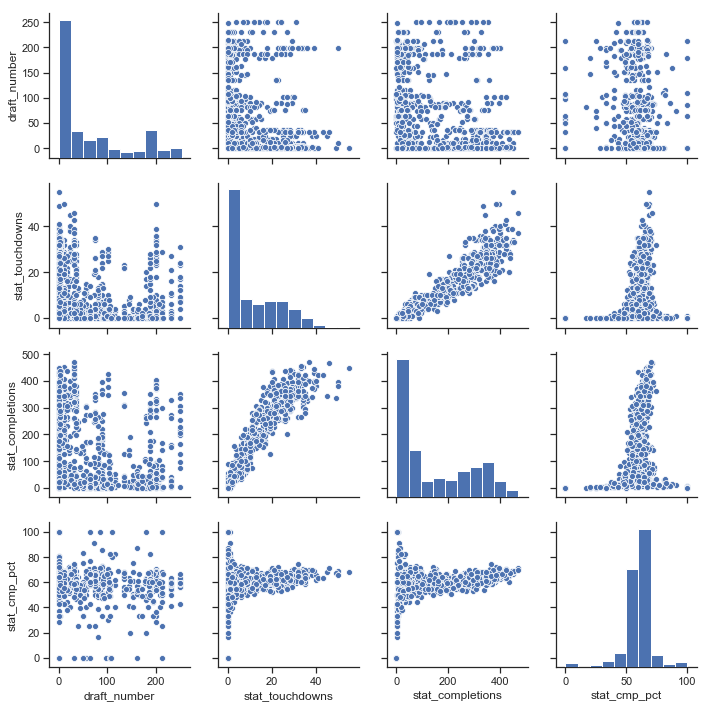

In [27]:
sns.pairplot(draftnumber_touchdowns_df)